In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [52]:
img = cv2.imread('Patient-Stanford 4DCTLiver\Study-ANON76298-CT-Liver benchmark[20100714]\Series-006\img-00007-00001.jpg')

kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)

cv2.imshow('muestra',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [53]:
blur = cv2.GaussianBlur(img,(5,5),0)
cv2.imshow('muestra',blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [26]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges_img = cv2.Canny(gray_img, 100, 200)

In [33]:
img.shape

(512, 512, 3)

In [34]:
img.size

786432

In [35]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

In [36]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

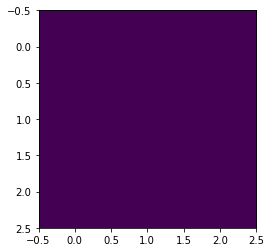

In [41]:
plt.imshow(kernel)

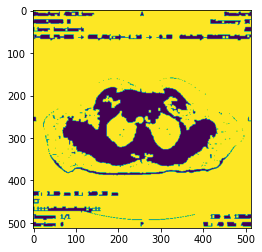

In [42]:
plt.imshow(opening)

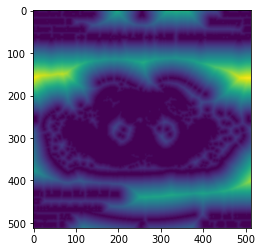

In [44]:
plt.imshow(dist_transform)

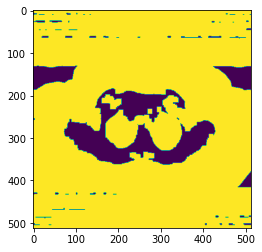

In [40]:
unknown
plt.imshow(unknown)

In [38]:
sure_fg

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [39]:
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [13]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

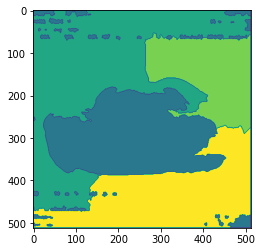

In [45]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]
plt.imshow(markers)

In [15]:
img

array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [  9,   2,   0],
        [ 20,  13,  20],
        ...,
        [  9,  10,   0],
        [  0,   0,   6],
        [255,   0,   0]],

       [[255,   0,   0],
        [ 13,   7,   0],
        [ 14,   6,  13],
        ...,
        [  2,  10,   0],
        [  0,   0,  10],
        [255,   0,   0]],

       ...,

       [[255,   0,   0],
        [  4,   2,   0],
        [  2,   9,  12],
        ...,
        [  2,   0,   0],
        [  0,   0,   3],
        [255,   0,   0]],

       [[255,   0,   0],
        [  6,   8,   2],
        [  0,   1,   0],
        ...,
        [  0,   2,   0],
        [  6,  12,  11],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]]

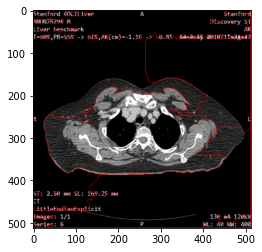

In [16]:
plt.imshow(img)

In [54]:
cv2.imshow('test',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [48]:
cv2.imshow('muestra',edges_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

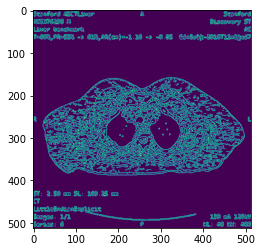

In [49]:
plt.imshow(edges_img)

In [55]:
cv2.imshow('Resultado',edges_img)
cv2.waitKey(0)
cv2.destroyAllWindows()